### How are the resulting discrete class labels distributed?
### Are the classes unbalanced, and how much? How are the features distributed?
### Are there any pairs or subsets of features that seem highly correlated or redundant?


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib widget

In [2]:
# load the data
df_annotations = pd.read_pickle(
    "dataset/task_2_annotations_82d1d6d1093eaab6_e330cbf_pandas.pkl"
)
df_annotations = df_annotations.dropna()  # remove NaNs (2 rows)
df_annotations

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2
31,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3
62,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4
93,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5
124,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,11,26,36,3,-1,3,2,1,4,1.0,3,2,3,5,4,2,2,5.0,3
3919,11,26,55,2,0,2,2,2,3,3.0,3,1,3,1,2,3,2,1.0,1
3950,11,26,136,2,1,2,1,1,2,2.0,2,2,1,1,2,2,1,2.0,2
3981,11,26,169,2,0,2,1,2,2,1.0,3,4,3,2,2,3,3,1.0,1


## Mean Aggregation of the data

In [33]:
# aggregate data and remove first 3 id columns
df_ann_agg = (
    df_annotations.groupby(["pianist_id", "segment_id"])
    .mean()
    .loc[:, "arousal":"gemmes_wandering"]
    .reset_index(level=[0, 1])
)
df_ann_agg

,pianist_id,segment_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,1,0,2.909091,0.181818,3.272727,3.181818,2.909091,3.727273,3.454545,2.090909,2.363636,2.090909,2.363636,3.818182,2.000000,2.090909,2.909091,3.545455
1,1,1,3.875000,0.000000,3.375000,3.250000,2.125000,2.375000,1.750000,2.375000,2.875000,2.625000,1.875000,3.375000,4.125000,2.500000,2.250000,2.000000
2,1,2,2.909091,0.181818,2.818182,2.545455,1.636364,1.545455,1.545455,2.909091,3.000000,3.363636,1.727273,3.000000,3.636364,3.000000,1.909091,2.090909
3,1,3,3.000000,-0.250000,1.875000,1.750000,1.375000,1.750000,1.375000,2.625000,1.500000,3.375000,2.375000,2.000000,3.250000,2.500000,1.750000,1.750000
4,1,4,3.000000,-0.181818,2.727273,2.636364,2.545455,2.545455,2.272727,2.363636,1.454545,2.727273,2.909091,3.000000,1.727273,2.363636,2.818182,2.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,11,22,2.181818,0.090909,2.727273,1.545455,3.272727,2.818182,3.454545,1.454545,2.090909,1.636364,2.545455,2.636364,2.272727,1.545455,3.000000,2.545455
293,11,23,3.166667,0.000000,2.833333,2.833333,1.666667,2.000000,1.333333,3.000000,1.666667,2.666667,1.166667,2.833333,2.833333,3.333333,2.833333,2.666667
294,11,24,2.000000,-0.181818,2.454545,1.636364,3.272727,3.818182,3.636364,1.181818,1.909091,1.636364,2.545455,3.545455,1.545455,1.363636,3.090909,2.545455
295,11,25,1.833333,0.000000,2.833333,2.000000,1.833333,3.500000,2.833333,1.333333,1.333333,1.500000,2.000000,3.500000,2.166667,2.166667,3.166667,2.666667


## Add discrete labels

In [34]:
def label_race(row):
    if row["valence"] <= 0 and row["arousal"] > 3:
        return "angry"
    elif row["valence"] > 0 and row["arousal"] >= 3:
        return "happy"
    elif row["valence"] < 0 and row["arousal"] <= 3:
        return "sad"
    elif row["valence"] >= 0 and row["arousal"] < 3:
        return "relaxed"
    else:
        return "None"


df_ann_agg["class"] = df_ann_agg.apply(lambda row: label_race(row), axis=1)
df_ann_agg

,pianist_id,segment_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering,class
0,1,0,2.909091,0.181818,3.272727,3.181818,2.909091,3.727273,3.454545,2.090909,2.363636,2.090909,2.363636,3.818182,2.000000,2.090909,2.909091,3.545455,relaxed
1,1,1,3.875000,0.000000,3.375000,3.250000,2.125000,2.375000,1.750000,2.375000,2.875000,2.625000,1.875000,3.375000,4.125000,2.500000,2.250000,2.000000,angry
2,1,2,2.909091,0.181818,2.818182,2.545455,1.636364,1.545455,1.545455,2.909091,3.000000,3.363636,1.727273,3.000000,3.636364,3.000000,1.909091,2.090909,relaxed
3,1,3,3.000000,-0.250000,1.875000,1.750000,1.375000,1.750000,1.375000,2.625000,1.500000,3.375000,2.375000,2.000000,3.250000,2.500000,1.750000,1.750000,sad
4,1,4,3.000000,-0.181818,2.727273,2.636364,2.545455,2.545455,2.272727,2.363636,1.454545,2.727273,2.909091,3.000000,1.727273,2.363636,2.818182,2.363636,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,11,22,2.181818,0.090909,2.727273,1.545455,3.272727,2.818182,3.454545,1.454545,2.090909,1.636364,2.545455,2.636364,2.272727,1.545455,3.000000,2.545455,relaxed
293,11,23,3.166667,0.000000,2.833333,2.833333,1.666667,2.000000,1.333333,3.000000,1.666667,2.666667,1.166667,2.833333,2.833333,3.333333,2.833333,2.666667,angry
294,11,24,2.000000,-0.181818,2.454545,1.636364,3.272727,3.818182,3.636364,1.181818,1.909091,1.636364,2.545455,3.545455,1.545455,1.363636,3.090909,2.545455,sad
295,11,25,1.833333,0.000000,2.833333,2.000000,1.833333,3.500000,2.833333,1.333333,1.333333,1.500000,2.000000,3.500000,2.166667,2.166667,3.166667,2.666667,relaxed


#### There are now no samples that cannot be classified

Without aggregation there are the samples with arousal = 3 and valence = 0 .

In [35]:
df_ann_agg["class"].unique()

array(['relaxed', 'angry', 'sad', 'happy'], dtype=object)

# Class distribution

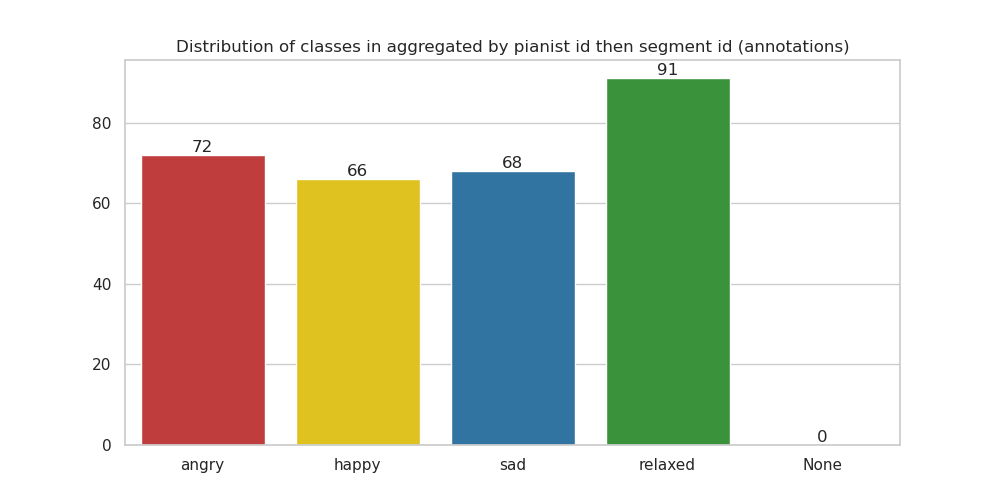

In [36]:
def plot_class_dist(df, title):
    sns.set_theme(style="whitegrid")

    # get the data the hard way
    x = ["angry", "happy", "sad", "relaxed", "None"]

    # color palette as dictionary
    palette = {
        "angry": "tab:red",
        "happy": "gold",
        "sad": "tab:blue",
        "relaxed": "tab:green",
        "None": "tab:gray",
    }

    y = [(df["class"] == c).sum() for c in x]

    # use subplot to change size
    fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
    # barplot
    ax1 = sns.barplot(x=x, y=y, palette=palette, ax=ax)
    # add numbers on top of bars
    ax1.bar_label(ax.containers[0])
    ax1.set_title(title)


plot_class_dist(
    df_ann_agg,
    "Distribution of classes in aggregated by pianist id then segment id (annotations)",
)

### Class distribution without aggregation

not important

In [37]:
df_annotations["class"] = df_annotations.apply(lambda row: label_race(row), axis=1)
df_annotations

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering,class
0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2,sad
31,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3,sad
62,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4,relaxed
93,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5,relaxed
124,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,11,26,36,3,-1,3,2,1,4,1.0,3,2,3,5,4,2,2,5.0,3,sad
3919,11,26,55,2,0,2,2,2,3,3.0,3,1,3,1,2,3,2,1.0,1,relaxed
3950,11,26,136,2,1,2,1,1,2,2.0,2,2,1,1,2,2,1,2.0,2,relaxed
3981,11,26,169,2,0,2,1,2,2,1.0,3,4,3,2,2,3,3,1.0,1,relaxed


Here are some samples that do not belong to any class.

In [38]:
df_annotations["class"].unique()

array(['sad', 'relaxed', 'happy', 'None', 'angry'], dtype=object)

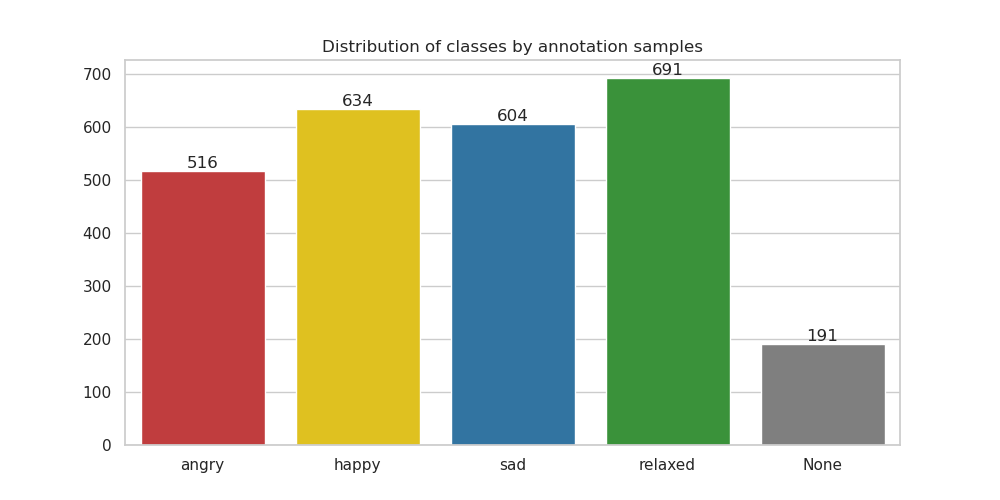

In [41]:
plot_class_dist(df_annotations, "Distribution of classes by annotation samples")

## Feature distribution

In [42]:
# load the feature data
df_features = pd.read_pickle(
    "dataset/task_2_features_1d8b658c21ddc127_e330cbf_pandas.pkl"
)
df_features

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.106446,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.193342,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.218179,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.118148,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.121018,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.203668,0.00000,0.052074,0.377220,0.269012,0.014044,0.004991,0.007948,0.013532,0.020522
4176,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.161435,0.00000,0.029478,0.251830,0.353269,0.011126,0.004529,0.005563,0.011076,0.016763
4177,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.130765,0.00000,0.025099,0.151084,0.319188,0.009205,0.004808,0.004193,0.008083,0.016254
4178,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.247554,0.00000,0.084562,0.600001,0.133573,0.013538,0.004881,0.007919,0.012861,0.019997


### Map the class from the **aggregated** annotations to the features

In [64]:
df_ann_agg[(df_ann_agg["pianist_id"] == 3) & (df_ann_agg["segment_id"] == 1)]["class"].to_numpy()[0]

'sad'

In [68]:
df_features["class"] = "None"

for row in df_features.iterrows():

    pianist_id = row[1]["pianist_id"]
    segment_id = row[1]["segment_id"]
    agg_ann_row = df_ann_agg[
        (df_ann_agg["pianist_id"] == pianist_id)
        & (df_ann_agg["segment_id"] == segment_id)
    ]

    df_features["class"][row[0]] =agg_ann_row["class"].to_numpy()[0]

df_features

/tmp/ipykernel_76169/2475362736.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["class"][row[0]] =agg_ann_row["class"].to_numpy()[0]


,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90,class
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025,relaxed
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610,relaxed
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690,relaxed
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971,relaxed
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731,relaxed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.00000,0.052074,0.377220,0.269012,0.014044,0.004991,0.007948,0.013532,0.020522,relaxed
4176,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.00000,0.029478,0.251830,0.353269,0.011126,0.004529,0.005563,0.011076,0.016763,relaxed
4177,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.00000,0.025099,0.151084,0.319188,0.009205,0.004808,0.004193,0.008083,0.016254,relaxed
4178,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.00000,0.084562,0.600001,0.133573,0.013538,0.004881,0.007919,0.012861,0.019997,relaxed


In [69]:
df_features["class"].unique()

array(['relaxed', 'angry', 'sad', 'happy'], dtype=object)

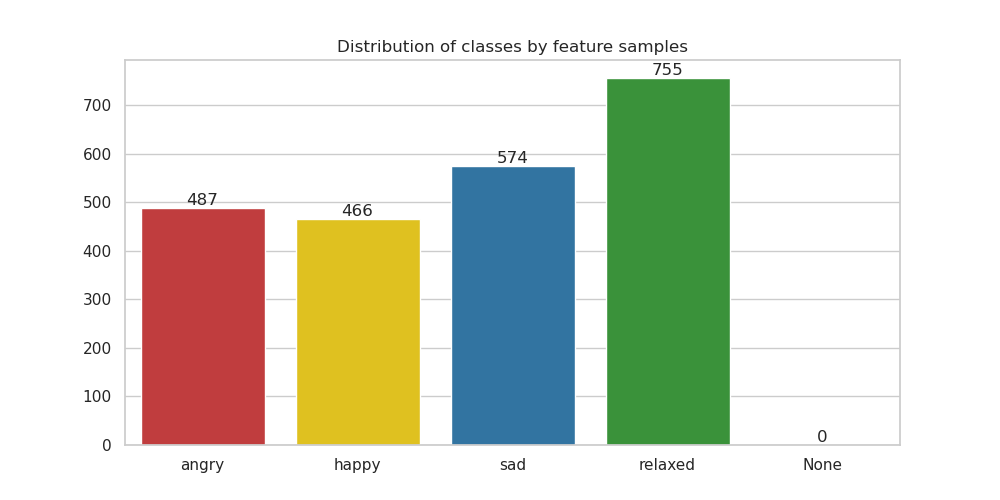

In [70]:
plot_class_dist(df_features, "Distribution of classes by feature samples")

# Mean Aggregate features by segments

Not really necessary (not used)

In [14]:
df_feat_agg = (
    df_features.groupby("segment_id")
    .mean()
    .loc[:, "essentia_dissonance_mean":"mirtoolbox_roughness_pct_90"]
)

# Feature Correlations

In [71]:
df_only_feat = df_features.loc[
    :, "essentia_dissonance_mean":"mirtoolbox_roughness_pct_90"
]

feat_corr = df_only_feat.corr(method="pearson")

feat_corr

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
essentia_dissonance_mean,1.000000,0.116425,-0.220164,0.541317,0.037410,0.454481,-0.420966,0.315372,-0.027128,0.125003,...,0.068878,0.031532,0.168396,0.126605,-0.014848,0.635549,0.220241,0.617400,0.641805,0.585331
essentia_dissonance_stdev,0.116425,1.000000,0.218579,-0.116427,0.085701,-0.104490,0.135578,0.085947,0.150597,-0.041865,...,-0.003272,-0.002139,0.019700,0.006764,0.049062,0.042295,0.271648,-0.054950,0.036221,0.112051
essentia_dynamic_complexity,-0.220164,0.218579,1.000000,-0.278917,-0.155769,-0.228460,0.404970,0.073475,0.270598,0.190119,...,-0.150539,-0.052567,-0.203150,-0.170770,0.054652,-0.380703,0.135436,-0.489753,-0.375635,-0.278454
essentia_loudness,0.541317,-0.116427,-0.278917,1.000000,0.113018,0.314529,-0.351983,0.074167,-0.177969,-0.035099,...,-0.064340,-0.008194,0.005962,-0.018827,0.015777,0.489451,0.072752,0.519419,0.490006,0.426246
essentia_onset_rate,0.037410,0.085701,-0.155769,0.113018,1.000000,0.027693,0.020699,0.100652,0.246354,-0.356232,...,0.108877,0.000109,0.111537,0.095605,0.255890,0.029851,-0.001028,0.043336,0.018058,0.019494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mirtoolbox_roughness_mean,0.635549,0.042295,-0.380703,0.489451,0.029851,0.742927,-0.575087,-0.075300,-0.096522,0.238975,...,0.092503,0.066090,0.215588,0.130965,-0.064532,1.000000,0.466514,0.941138,0.995234,0.960188
mirtoolbox_roughness_std,0.220241,0.271648,0.135436,0.072752,-0.001028,0.318574,-0.000133,-0.122743,0.015038,0.229444,...,-0.052696,0.021724,0.040105,-0.018081,-0.072197,0.466514,1.000000,0.162782,0.437264,0.683250
mirtoolbox_roughness_pct_10,0.617400,-0.054950,-0.489753,0.519419,0.043336,0.704670,-0.643383,-0.041004,-0.109211,0.171687,...,0.129546,0.068023,0.232356,0.160639,-0.046956,0.941138,0.162782,1.000000,0.938342,0.824849
mirtoolbox_roughness_pct_50,0.641805,0.036221,-0.375635,0.490006,0.018058,0.741932,-0.573024,-0.073204,-0.099485,0.240739,...,0.087526,0.064384,0.208601,0.124338,-0.060003,0.995234,0.437264,0.938342,1.000000,0.944026


## Correlation by significance:

- weak: $0.1 \leq |r| < 0.3$
- medium: $0.3 \leq |r| < 0.5$
- strong: $0.5 \leq |r|$

with $r$ being the pearson correlation coefficient.

Sort feature pairs by their correlation significance.


In [72]:
from itertools import combinations

weak = []
medium = []
strong = []
no_corr = []

feature_combis = combinations(feat_corr.columns, 2)
n_combis = len(list(combinations(feat_corr.columns, 2)))
print(f"Number of feature combinations: {n_combis}")


for f1, f2 in feature_combis:
    corr = feat_corr[f1].loc[f2]
    # weak
    if 0.1 <= abs(corr) < 0.3:
        weak.append(dict([("corr", corr), ("feature 1", f1), ("feature 2", f2)]))

    # medium
    elif 0.3 <= abs(corr) < 0.5:
        medium.append(dict([("corr", corr), ("feature 1", f1), ("feature 2", f2)]))

    # strong
    elif 0.5 <= abs(corr):
        strong.append(dict([("corr", corr), ("feature 1", f1), ("feature 2", f2)]))
    # no correlation
    else:
        no_corr.append(dict([("corr", corr), ("feature 1", f1), ("feature 2", f2)]))

Number of feature combinations: 14196


In [73]:
df_weak = pd.DataFrame(weak)
df_medium = pd.DataFrame(medium)
df_strong = pd.DataFrame(strong)
df_no_corr = pd.DataFrame(no_corr)

Text(0.5, 1.0, 'Number of pairs by correlation (total pairs = 14196)')

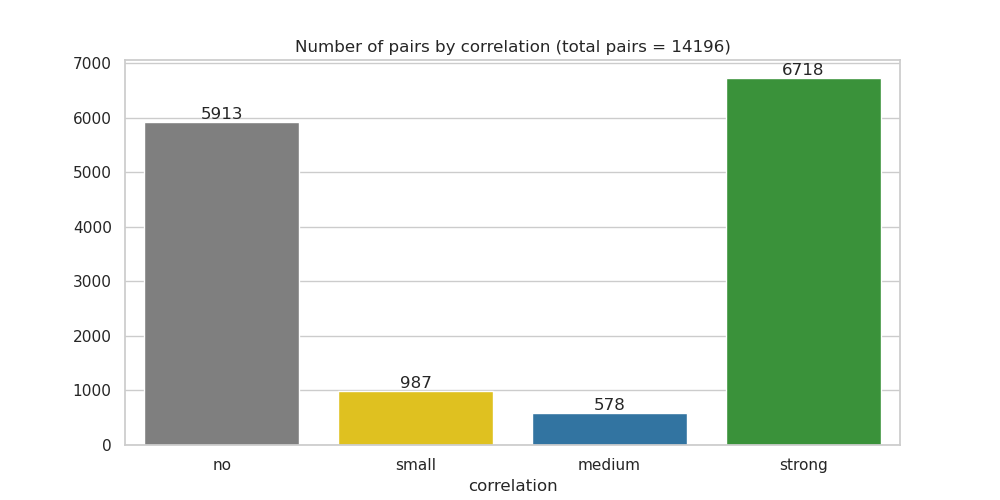

In [74]:
sns.set_theme(style="whitegrid")

# get the data the hard way
x = ["no", "small", "medium", "strong"]


# color palette as dictionary
palette = {
    "no": "tab:gray",
    "small": "gold",
    "medium": "tab:blue",
    "strong": "tab:green",
}

y = [len(df) for df in [df_weak, df_medium, df_strong, df_no_corr]]

# use subplot to change size
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
# barplot
ax1 = sns.barplot(x=x, y=y, palette=palette, ax=ax)
# add numbers on top of bars
ax1.bar_label(ax.containers[0])
ax1.set_xlabel("correlation")
ax1.set_title(f"Number of pairs by correlation (total pairs = {n_combis})")

This does not really help 

<AxesSubplot:>

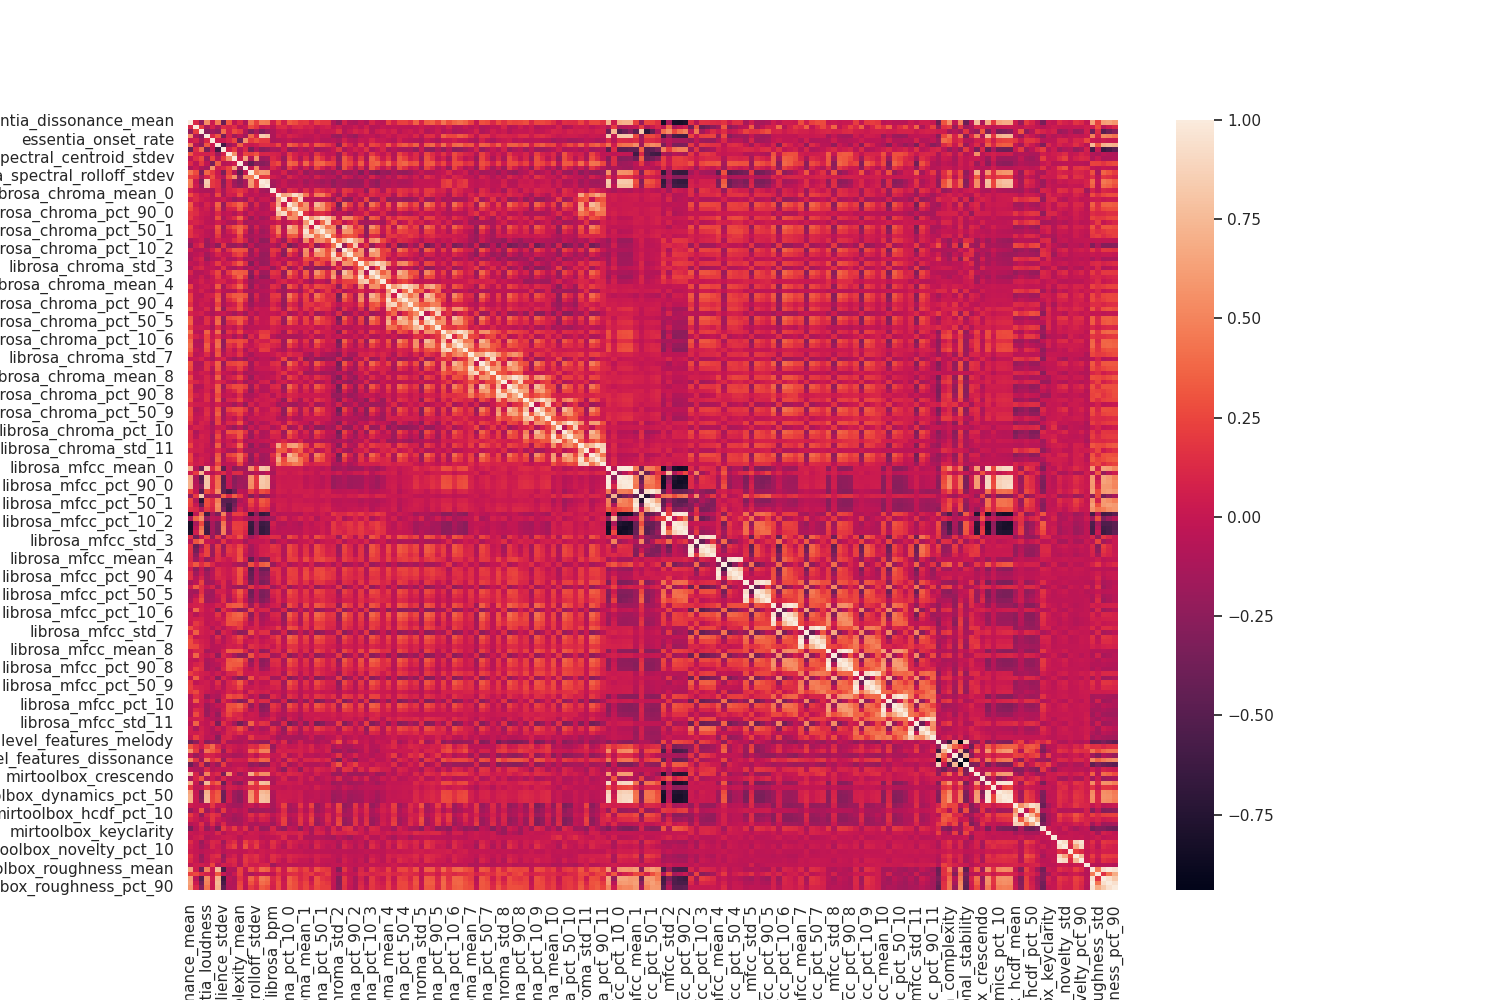

In [75]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
sns.heatmap(feat_corr, annot=False)